In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

import scipy.stats as stats





In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [59]:
df = pd.read_csv('concrete_data.csv')

In [60]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [61]:
df.shape

(1030, 9)

In [62]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [63]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [64]:
X = df.drop(columns = ['Strength'])
Y = df.iloc[:, -1]

In [65]:
X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [66]:
# applying regression without any transformation
lr  = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
r2_score(Y_test, Y_pred)

0.6275531792314848

In [67]:
#cross checking with cross val score
lr = LinearRegression()
cv_scores = cross_val_score(lr, X, Y, scoring='r2', cv=5)
# Calculate the mean R^2 score
mean_r2 = np.mean(cv_scores)
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean R^2 Score: {mean_r2:.4f}")

Cross-Validation R^2 Scores: [0.33015205 0.41207076 0.45175533 0.60725028 0.50374183]
Mean R^2 Score: 0.4610


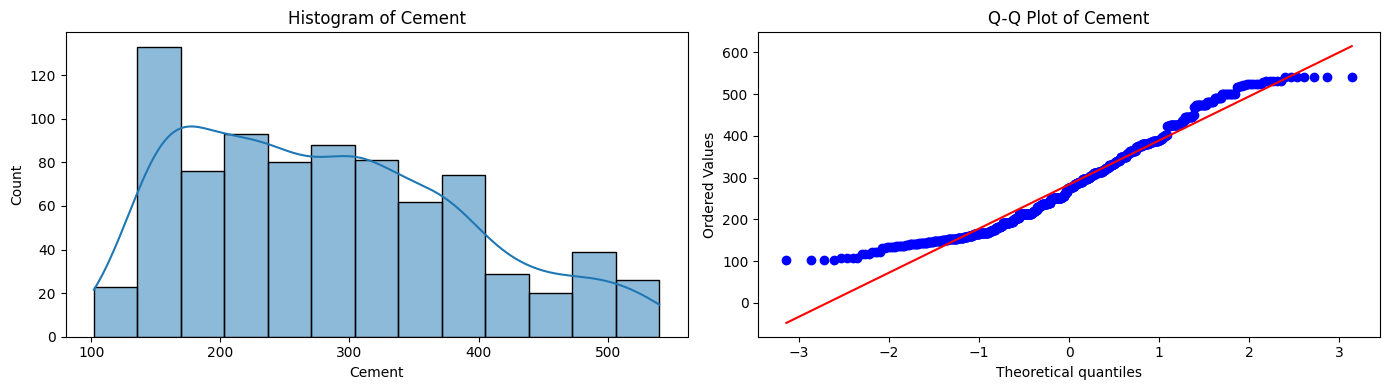

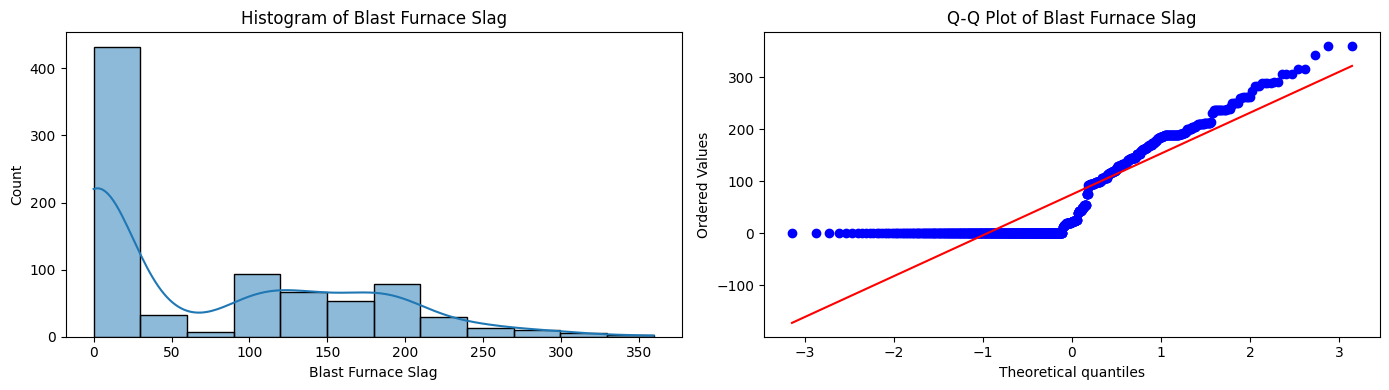

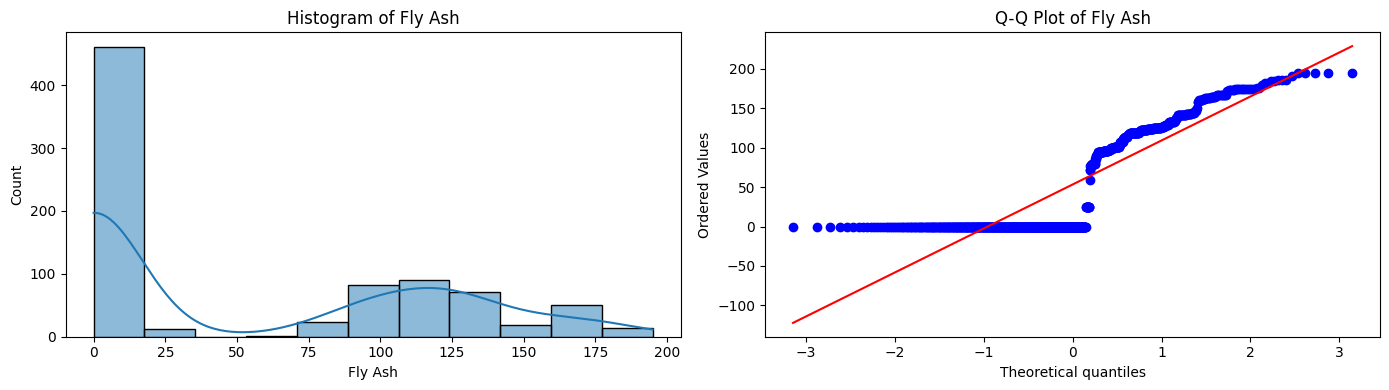

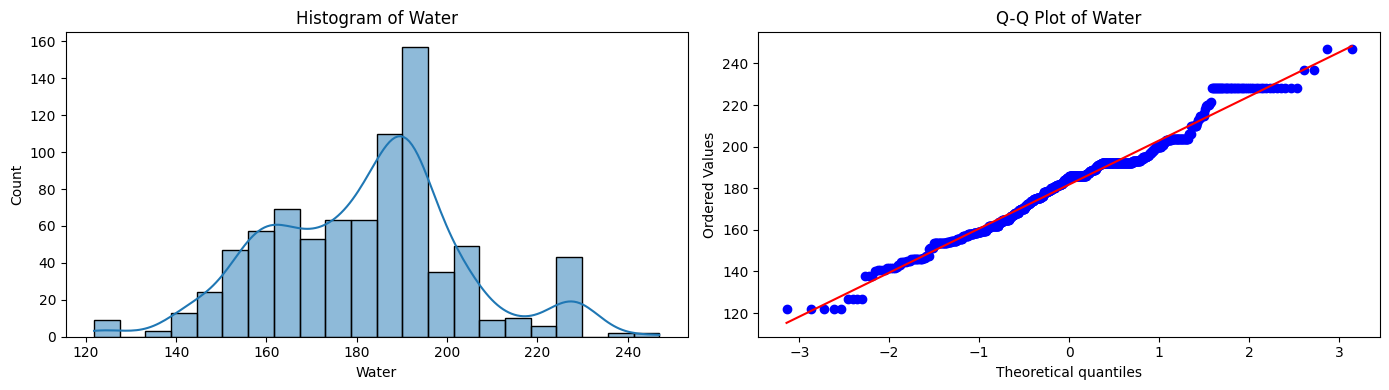

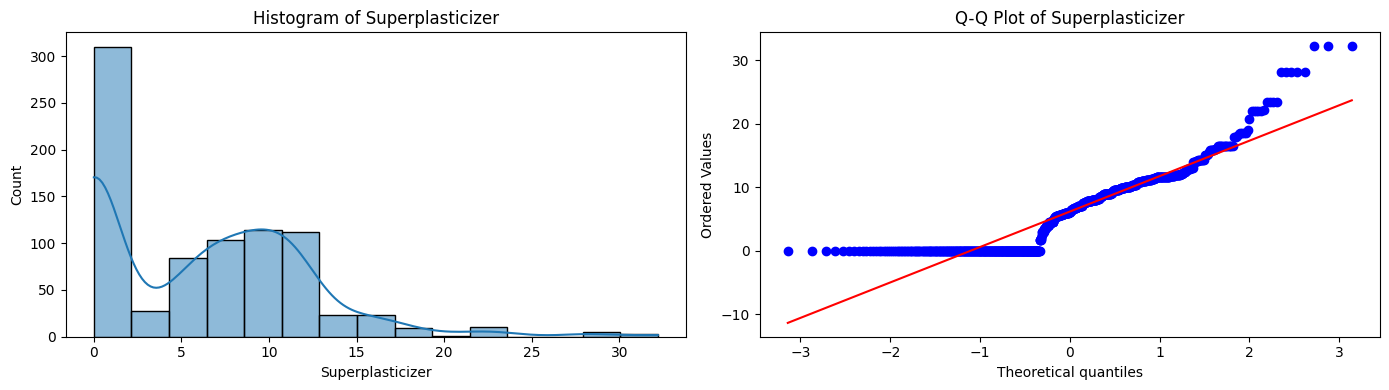

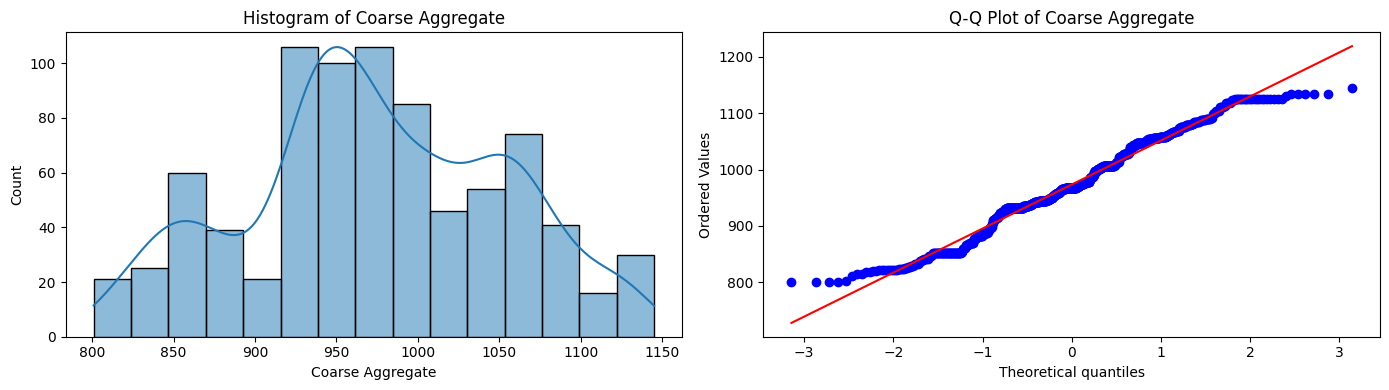

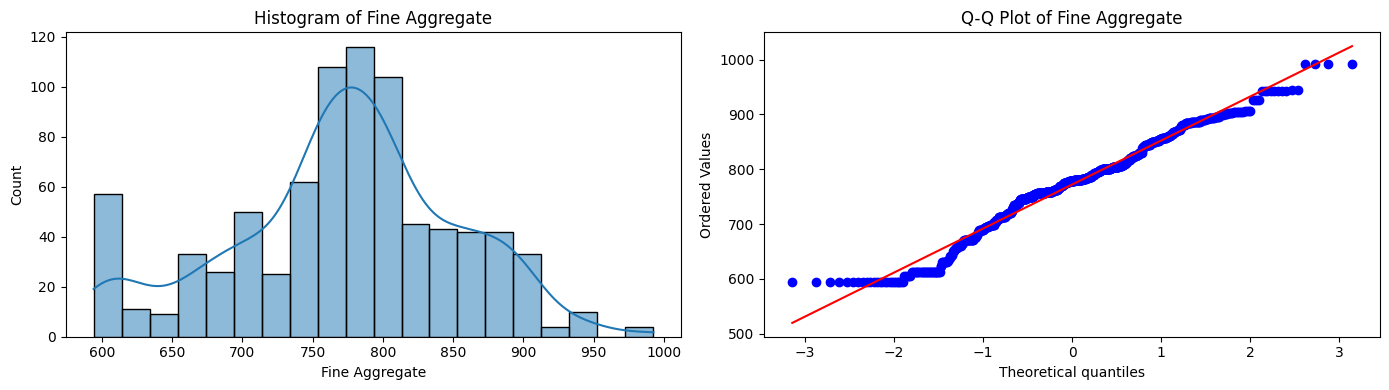

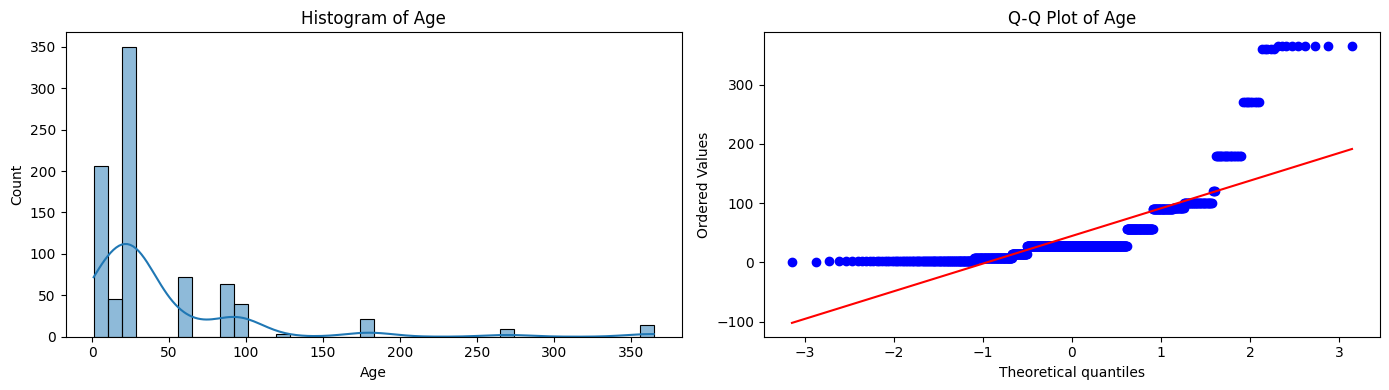

In [68]:
#plotting displot without any transformation

for col in X_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.histplot(X_train[col], kde=True)  # Use histplot instead of displot
    plt.title(f'Histogram of {col}')

    # Subplot 2: Q-Q Plot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [71]:
pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train +0.000001)

X_test_transformed = pt.fit_transform(X_test +0.000001)

pd.DataFrame({'cols':X_train.columns, 'box-cox-lambdas':pt.lambdas_})

,cols,box-cox-lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [73]:
#applying linear regression on trasnformed data

lr = LinearRegression()
lr.fit(X_train_transformed, Y_train)

Y_pred2 = lr.predict(X_test_transformed)
r2_score(Y_test, Y_pred2 )

0.8055320999414497

In [75]:
#using cross val
pt = PowerTransformer(method = 'box-cox')

X_transformed = pt.fit_transform(X +0.000001)

lr = LinearRegression()

np.mean(cross_val_score(lr,X_transformed,Y,scoring = 'r2'))

0.666295031974616

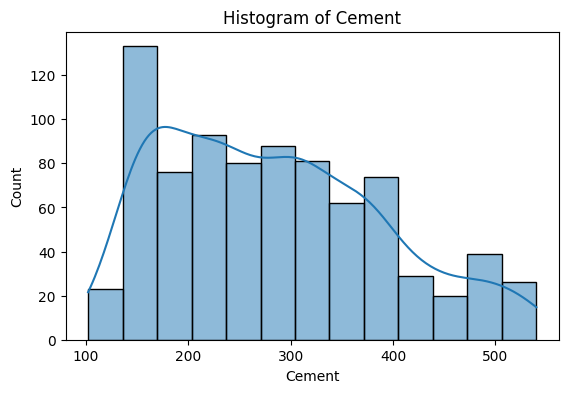

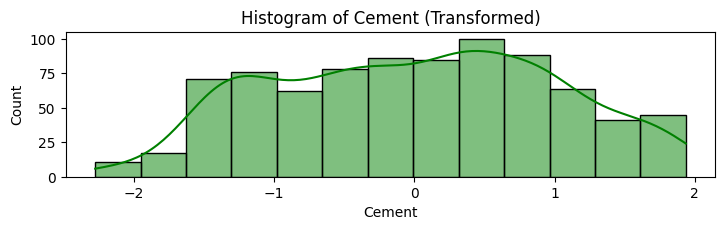

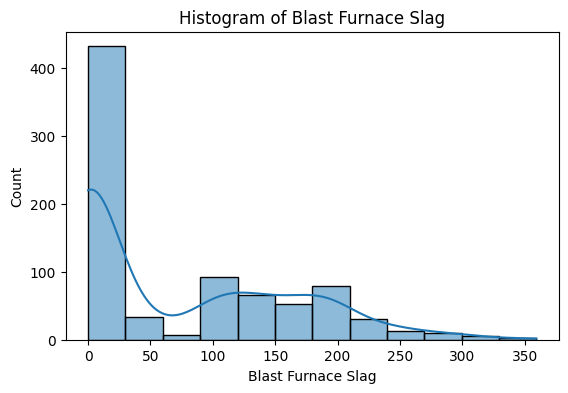

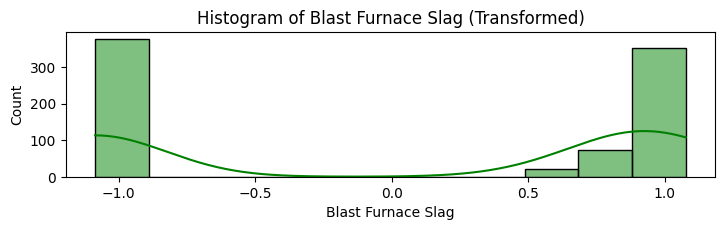

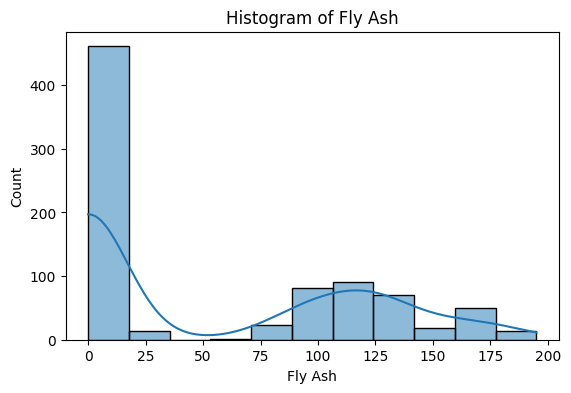

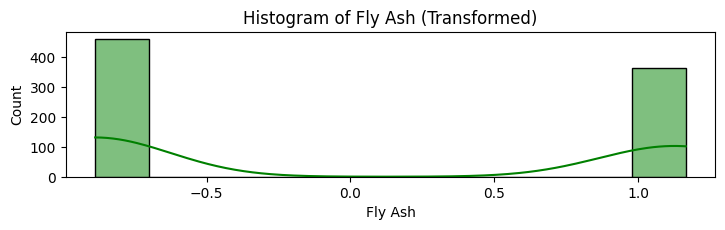

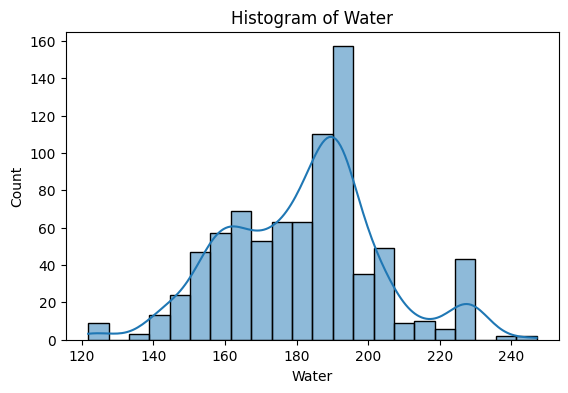

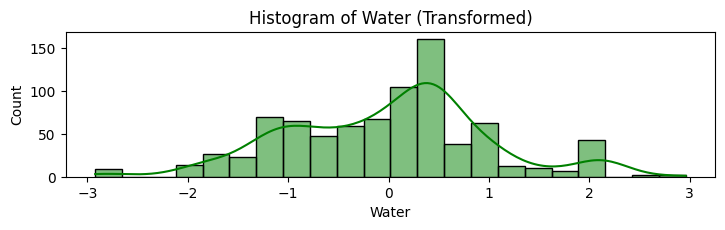

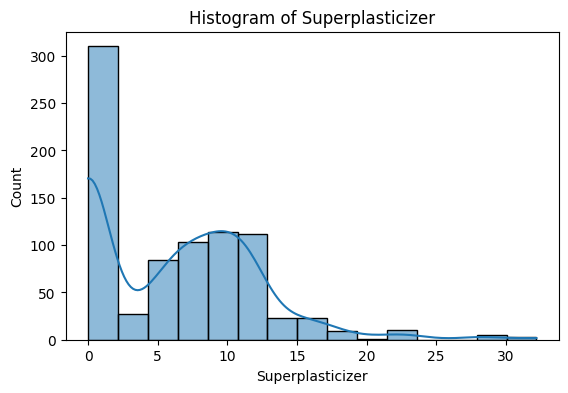

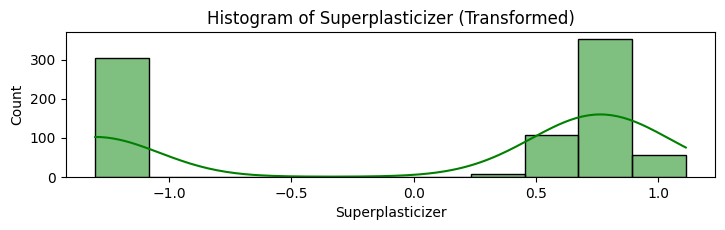

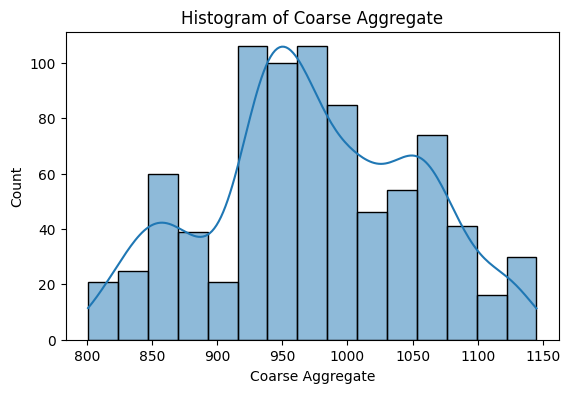

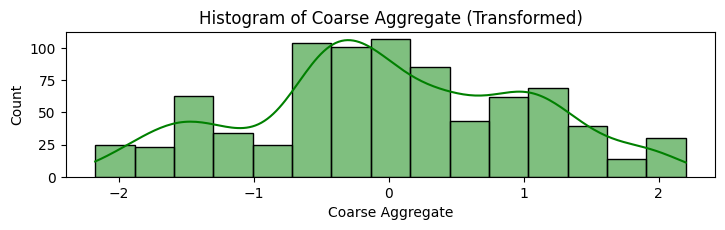

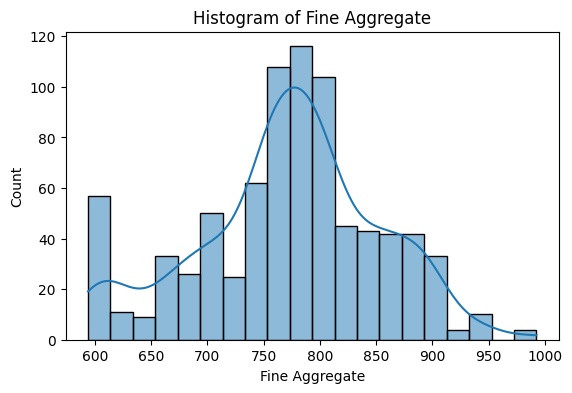

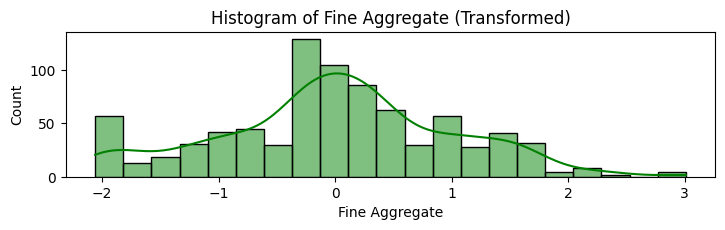

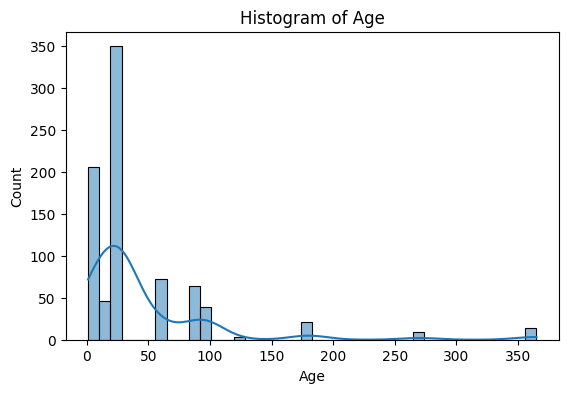

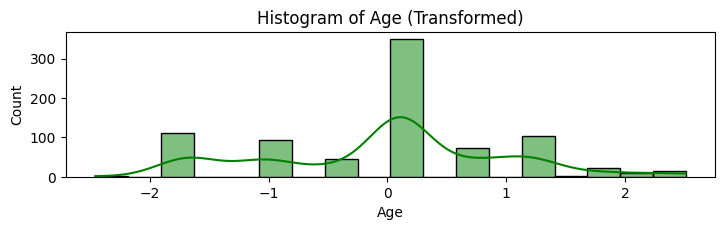

In [82]:
#before and after comparison for box-cox-plot
X_train_transformed = pd.DataFrame(X_train_transformed , columns = X_train.columns)
for col in X_train_transformed.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.histplot(X_train[col], kde=True)  # Use histplot instead of displot
    plt.title(f'Histogram of {col}')

    # Subplot 2: Q-Q Plot
    plt.figure(figsize = (14,4))
    plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
    sns.histplot(X_train_transformed[col], kde=True, color='green')
    plt.title(f'Histogram of {col} (Transformed)')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    

In [86]:
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, Y_train)

Y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(Y_test,Y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lamdas':pt1.lambdas_})

0.8161906513339304


,cols,Yeo_Johnson_lamdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885
